# 선형회귀 개요

선형 회귀(線型回歸, Linear regression)는 종속 변수 y와 한 개 이상의 독립 변수X와의 선형 상관 관계를 모델링하는 회귀분석 기법. [위키백과](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)

## 선형회귀 모델
- 각 Feature들에 가중치(Weight)를 곱하고 편향(bias)를 더해 예측 결과를 출력한다.
- Weight와 bias가 학습 대상 Parameter가 된다.

$$
\hat{y_i} = w_1 x_{i1} + w_2 x_{i2}... + w_{p} x_{ip} + b
\\
\hat{y_i} = \mathbf{w}^{T} \cdot \mathbf{X} 
$$

- $\hat{y_i}$: 예측값
- $x$: 특성(feature-컬럼)
- $w$: 가중치(weight), 회귀계수(regression coefficient). 특성이 $\hat{y_i}$ 에 얼마나 영향을 주는지 정도
- $b$: 절편
- $p$: p 번째 특성(feature)/p번째 가중치
- $i$: i번째 관측치(sample)

## LinearRegression
- 가장 기본적인 선형 회귀 모델
- 각 Feauture에 가중합으로 Y값을 추론한다.
### 데이터 전처리

- **선형회귀 모델사용시 전처리**
    - **범주형 Feature**
        - : 원핫 인코딩
    - **연속형 Feature**
        - Feature Scaling을 통해서 각 컬럼들의 값의 단위를 맞춰준다.
        - StandardScaler를 사용할 때 성능이 더 잘나오는 경향이 있다.

In [6]:
from dataset import get_boston_dataset
X_train, X_test, y_train, y_test = get_boston_dataset()

In [9]:
X_train.shape

(379, 13)

트리, 부스팅은 피쳐스케일링 사용할 필요없고 나머지는 다한다 생각하면됨.

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:
# 학습후 각 feature들에 곱할 가중치들.
lr.coef_ #가중치

array([-0.97100092,  1.04667838, -0.04044753,  0.59408776, -1.80876877,
        2.60991991, -0.19823317, -3.00216551,  2.08021582, -1.93289037,
       -2.15743759,  0.75199122, -3.59027047])

In [16]:
# bias(편향-절편)
lr.intercept_  # 편향절편 b값

22.608707124010557

In [17]:
pred_train = X_train_scaled @ lr.coef_.reshape(-1,1) + lr.intercept_
pred_train.shape

(379, 1)

> ### Coeficient의 부호
> - weight가 
> - 양수: Feature가 1 증가할때 y(집값)도 weight만큼 증가한다.
> - 음수: Feature가 1 증가할때 y(집값)도 weight만큼 감소한다.
> - 절대값 기준으로 0에 가까울 수록 집값에 영향을 주지 않고 크면 클수록(0에서 멀어질 수록) 집값에 영향을 많이 주는 Feature 란 의미가 된다.

In [18]:
#추론
pred_1 = lr.predict(X_train_scaled[0].reshape(1, -1))
pred_1

array([13.54334096])

In [19]:
X_train_scaled[0].reshape(1,-1)

array([[-0.3906002 ,  0.42637011, -0.74491444, -0.265747  , -1.07873298,
        -1.02196078,  0.05196998,  1.99457086, -0.27832777, -0.42799376,
         0.27878885,  0.34049624,  0.82212111]])

In [20]:
X_train_scaled[0] @ lr.coef_ + lr.intercept_

13.543340962285875

In [21]:
pred_train = X_train_scaled @ lr.coef_.reshape(-1, 1) + lr.intercept_
pred_train.shape

(379, 1)

In [22]:
pred_train2 = lr.predict(X_train_scaled)
pred_train2.shape

(379,)

In [23]:
pred_train2[:10]

array([13.54334096, 21.03611757, 35.25707372, 19.31180705, 12.9193462 ,
       13.83454251, 22.66868871, 14.2409856 , 31.24023391, 25.2746277 ])

In [24]:
(pred_train == pred_train2).sum()

379

##### 평가

In [25]:
from metrics import print_metrics_regression
print_metrics_regression(y_train, pred_train, "train set")

============train set============
MSE: 19.640519427908043
RMSE: 4.431762564477935
R2: 0.7697699488741149


In [27]:
pred_test = lr.predict(X_test_scaled)
print_metrics_regression(y_test, pred_test, "test set")

============test set============
MSE: 29.78224509230234
RMSE: 5.457311159564052
R2: 0.6354638433202132


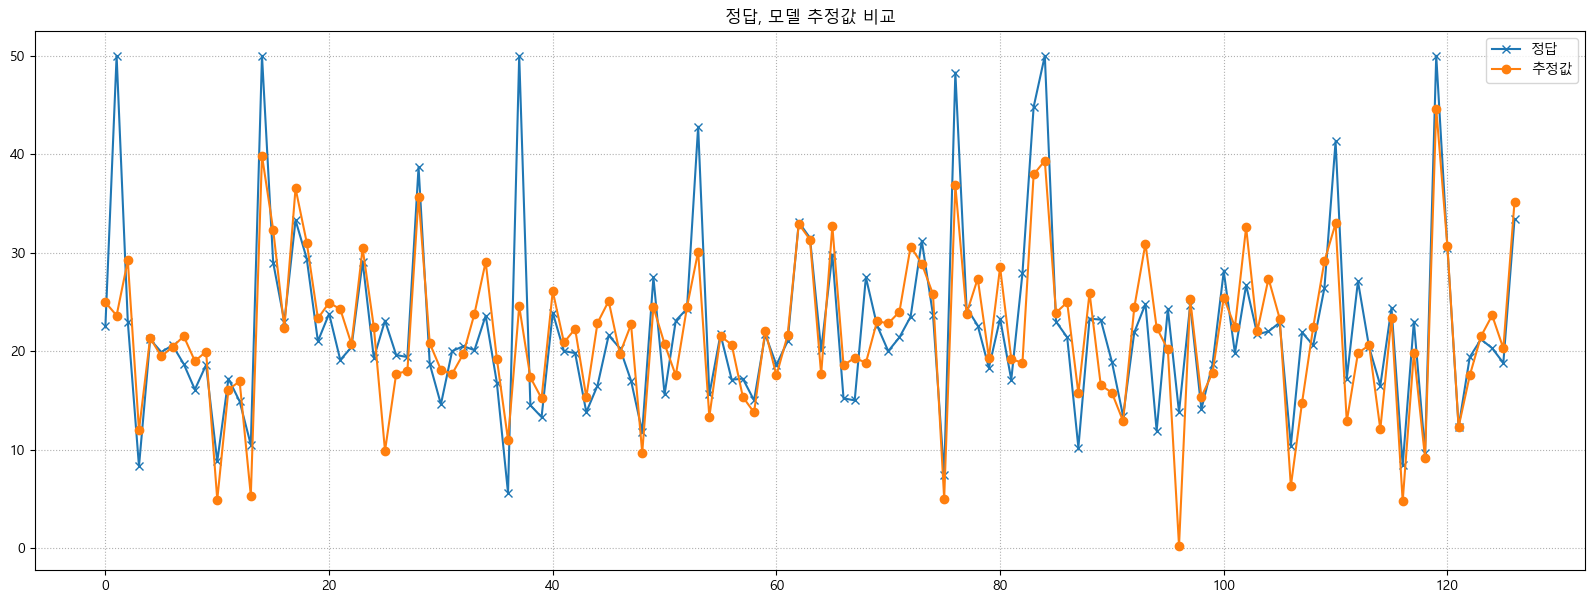

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))
x = range(len(y_test))
plt.plot(x, y_test, marker='x', label="정답")
plt.plot(x, pred_test, marker='o', label="추정값")
plt.legend()
plt.grid(True, linestyle=':')
plt.title("정답, 모델 추정값 비교")
plt.show()

# 다항회귀 (Polynomial Regression)
- **데이터 전처리방식 중 하나**로 Feature가 너무 적어 y의 값들을 다 설명하지 못하여 underfitting이 된 경우 Feature를 늘려준다.
- 각 Feature들을 거듭제곱한 것과 Feature들 끼리 곱한 새로운 특성들을 추가한다.
    - 파라미터 가중치를 기준으로는 일차식이 되어 선형모델이다. 입력데이터(X)들을 기준으로는 N차식이 되어 비선형 데이터를 추론할 수 있는 모델이 된다.
- `PolynomialFeatures` Transformer를 사용해서 변환한다.

## 예제

##### 데이터셋 만들기

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

# 우리가 찾아야 하는 함수
def func(X):
    return X**2 + X + 2 + np.random.normal(0,1, (X.size,1))

N = 100 # 생성할 데이터 개수
X = 6 * np.random.rand(N, 1) - 3   # X값
y = func(X)

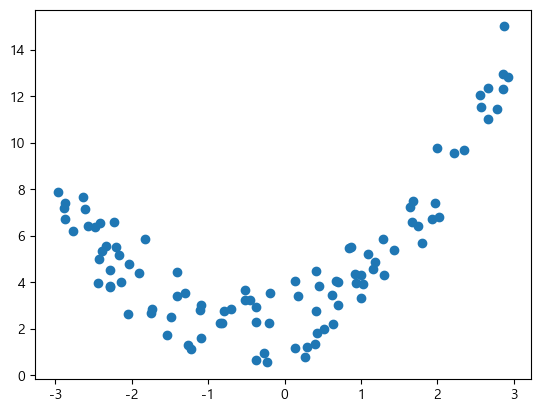

In [30]:
plt.scatter(X, y);
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression
from metrics import print_metrics_regression

lr = LinearRegression()
lr.fit(X, y)

print_metrics_regression(y, lr.predict(X))

MSE: 7.729204760808937
RMSE: 2.7801447373848966
R2: 0.19138252437306003


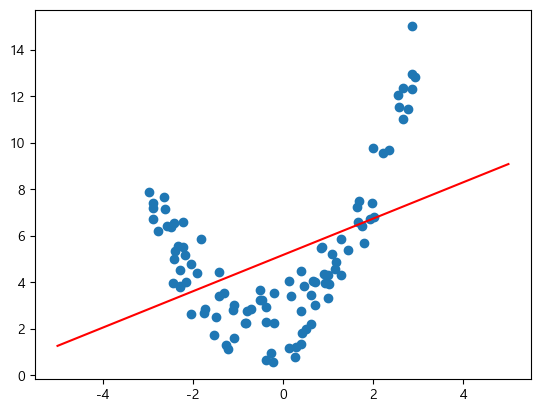

In [41]:
X_new = np.linspace(-5, 5, 1000).reshape(-1, 1)
# X_new.shape
pred = lr.predict(X_new)

plt.scatter(X, y)
plt.plot(X_new, pred, color='red')
plt.show()

In [36]:
X_new.shape

(1000, 1)

In [7]:
X_new[:10]

array([[-5.        ],
       [-4.98998999],
       [-4.97997998],
       [-4.96996997],
       [-4.95995996],
       [-4.94994995],
       [-4.93993994],
       [-4.92992993],
       [-4.91991992],
       [-4.90990991]])

In [38]:
# PolynomialFeatures 를 이용해서 feature를 N 제곱한 파생변수(컬럼)을 생성.
from sklearn.preprocessing import PolynomialFeatures

# degree: 몇 제곱까지한 파생변수들을 생성할지 최고차를 지정.  degree=4,  X1-> X1, X1**2, X1**3, X1**4
pn = PolynomialFeatures(degree=5,
                        include_bias=False # True(기본값)- 상수항 컬럼 생성 -> 모든 값이 1로 구성된 컬럼.
                       )
X_poly = pn.fit_transform(X)  # fit(), transform()
X.shape, X_poly.shape

((100, 1), (100, 5))

In [39]:
X[:4]

array([[0.29288102],
       [1.2911362 ],
       [0.61658026],
       [0.2692991 ]])

In [40]:
X_poly[:4]

array([[2.92881024e-01, 8.57792940e-02, 2.51231274e-02, 7.35808727e-03,
        2.15504413e-03],
       [1.29113620e+00, 1.66703268e+00, 2.15236624e+00, 2.77899796e+00,
        3.58806487e+00],
       [6.16580256e-01, 3.80171213e-01, 2.34406064e-01, 1.44530151e-01,
        8.91144375e-02],
       [2.69299098e-01, 7.25220042e-02, 1.95301103e-02, 5.25944109e-03,
        1.41636274e-03]])

##### 모델생성, 학습

In [44]:
lr = LinearRegression()
lr.fit(X_poly, y)
lr.coef_, lr.intercept_

(array([[ 8.95010583e-01,  9.24689757e-01,  1.98166445e-02,
          3.13177300e-03, -7.48608971e-04]]),
 array([2.36755048]))

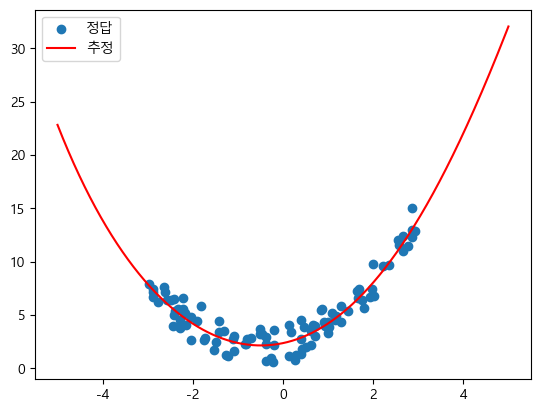

In [45]:
#Train set과 전처리한것과 동일한 전처리를 한다.
X_new_poly = pn.transform(X_new)
# X_new_poly.shape
pred2 = lr.predict(X_new_poly)

plt.scatter(X, y, label='정답')
plt.plot(X_new, pred2, color='red', label='추정')
plt.legend()
plt.show()

In [46]:
print_metrics_regression(y, lr.predict(X_poly), '평가')

============평가============
MSE: 0.9707019813909312
RMSE: 0.9852420927827491
R2: 0.8984466565359496


## degree를 크게
- Feature가 너무 많으면 Overfitting 문제가 생긴다.

In [48]:
pn2 = PolynomialFeatures(degree=30, include_bias=False)
X_poly2 = pn2.fit_transform(X)
print(X.shape, X_poly2.shape)
pn2.get_feature_names_out() # 변환된 Feature가 어떤 연산을 통해 생성됬는지를 알려준다.

(100, 1) (100, 30)


array(['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8',
       'x0^9', 'x0^10', 'x0^11', 'x0^12', 'x0^13', 'x0^14', 'x0^15',
       'x0^16', 'x0^17', 'x0^18', 'x0^19', 'x0^20', 'x0^21', 'x0^22',
       'x0^23', 'x0^24', 'x0^25', 'x0^26', 'x0^27', 'x0^28', 'x0^29',
       'x0^30'], dtype=object)

In [49]:
lr3 = LinearRegression()
lr3.fit(X_poly2, y)
print(lr3.coef_)
print(lr3.intercept_)

[[ 3.78426467e-01  2.95702962e+00  4.57210795e+00  4.79841348e-01
  -4.30554249e+00 -3.11112683e+00 -1.78192936e+00 -9.44591210e-01
   3.17238625e+00  2.72502468e+00  9.85010153e-01  8.91255448e-01
  -3.01283434e+00 -3.10371107e+00  1.96467916e+00  2.22924228e+00
  -6.90311720e-01 -8.62090534e-01  1.52864514e-01  2.09066463e-01
  -2.25415866e-02 -3.33342788e-02  2.23844963e-03  3.50410731e-03
  -1.45538450e-04 -2.34389610e-04  5.65017470e-06  9.05710077e-06
  -9.98977174e-08 -1.54109850e-07]]
[1.76774574]


In [52]:
print_metrics_regression(y, lr3.predict(X_poly2))

MSE: 1.427630810424566
RMSE: 1.194835055739731
R2: 0.8506434675005381


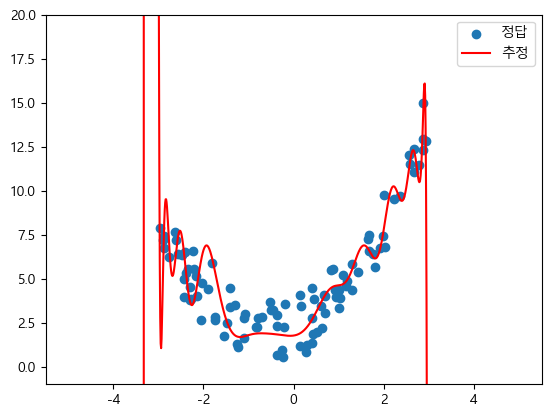

In [53]:
X_new_3 = pn2.transform(X_new)
pred_3 = lr3.predict(X_new_3)

plt.scatter(X, y, label='정답')
plt.plot(X_new, pred_3, label="추정", color='red')
plt.legend()
# plt.xlim(-3, 3)
plt.ylim(-1, 20)
plt.show()

### PolynomialFeatures 예제

In [55]:
data = np.arange(12).reshape(6, 2)
data.shape
data

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [57]:
pn = PolynomialFeatures(degree=2, include_bias=False)
# pn = PolynomialFeatures(degree=3, include_bias=False)
data_poly = pn.fit_transform(data)
data_poly.shape

(6, 5)

In [58]:
pn.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [59]:
data_poly

array([[  0.,   1.,   0.,   0.,   1.],
       [  2.,   3.,   4.,   6.,   9.],
       [  4.,   5.,  16.,  20.,  25.],
       [  6.,   7.,  36.,  42.,  49.],
       [  8.,   9.,  64.,  72.,  81.],
       [ 10.,  11., 100., 110., 121.]])

### PolynomialFeatures를 Boston Dataset에 적용

In [61]:
from sklearn.preprocessing import StandardScaler
from dataset import get_boston_dataset

X_train, X_test, y_train, y_test = get_boston_dataset()


In [64]:
pn = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = pn.fit_transform(X_train)
X_test_poly = pn.transform(X_test)

In [65]:
X_train_poly.shape , X_train.shape

((379, 104), (379, 13))

In [66]:
scaler = StandardScaler()
X_train_scaled_poly = scaler.fit_transform(X_train_poly)
X_test_scaled_poly = scaler.transform(X_test_poly)

In [67]:
X_train_scaled_poly.shape

(379, 104)

In [68]:
lr = LinearRegression()
lr.fit(X_train_scaled_poly, y_train)

LinearRegression()

In [69]:
pred_train = lr.predict(X_train_scaled_poly)
pred_test = lr.predict(X_test_scaled_poly)
print_metrics_regression(y_train, pred_train, "train set")
print_metrics_regression(y_test, pred_test, "test set")

============train set============
MSE: 4.090362612543775
RMSE: 2.022464489810334
R2: 0.9520519609032729
============test set============
MSE: 32.069135121582306
RMSE: 5.6629616916929875
R2: 0.6074721959665852


In [ ]:
lr2 = LinearRegression()
lr2.fit(X_train_scaled , y_train)
print_metrics_regression(y_train, lr2.predict(X_train_scaled), "train")
print_metrics_regression(y_test, lr2.predict(X_test_scaled), "test")

In [70]:
### pipeline 적용
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), 
                         StandardScaler(), 
                         LinearRegression())
pipeline.steps

[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
 ('standardscaler', StandardScaler()),
 ('linearregression', LinearRegression())]

In [71]:
pipeline.fit(X_train, y_train)
pred_test = pipeline.predict(X_test)

print_metrics_regression(y_test, pred_test, "pipeline")

============pipeline============
MSE: 32.069135121582306
RMSE: 5.6629616916929875
R2: 0.6074721959665852


In [74]:
pipeline = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), 
                         StandardScaler())
result = pipeline.fit_transform(X_train)
result.shape

(379, 104)

In [75]:
result.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

## 규제 (Regularization)
- 선형 회귀 모델에서 과대적합(Overfitting) 문제를 해결하기 위해 가중치(회귀계수)에 페널티 값을 적용한다.
- 입력데이터의 Feature들이 너무 많은 경우 Overfitting이 발생.
    - Feature수에 비해 관측치 수가 적은 경우 모델이 복잡해 지면서 Overfitting이 발생한다.
- 해결
    - 데이터를 더 수집한다. 
    - Feature selection
        - 불필요한 Features들을 제거한다.
    - 규제 (Regularization) 을 통해 Feature들에 곱해지는 가중치가 커지지 않도록 제한한다.(0에 가까운 값으로 만들어 준다.)
        - LinearRegression의 규제는 학습시 계산하는 오차를 키워서 모델이 오차를 줄이기 위해 가중치를 0에 가까운 값으로 만들도록 하는 방식을 사용한다.
        - L1 규제 (Lasso)
        - L2 규제 (Ridge)
    

## Ridge Regression (L2 규제)
- 손실함수(loss function)에 규제항으로 $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ (L2 Norm)을 더해준다.
- $\alpha$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절한다. 
    - $\alpha = 0$ 에 가까울수록 규제가 약해진다. (0일 경우 선형 회귀동일)
    - $\alpha$ 가 커질 수록 모든 가중치가 작아져(0에 가깝게된다.) 입력데이터의 Feature들 중 중요하지 않은 Feature의 예측에 대한 영향력이 작아지게 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \cfrac{1}{2}\sum_{i=1}^{n}{w_{i}^{2}}
$$

> **손실함수(Loss Function):** 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습할 때 사용된다.

In [76]:
from sklearn.linear_model import Ridge, Lasso

In [80]:
X_train, X_test, y_train, y_test = get_boston_dataset()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
alpha = 1  
# 규제항의 값을 조정하는 하이퍼파라미터. 기본값: 1 - 클수록 강한규제(모델 단순화.)
#  overfitting: alpha를 키운다. , underfitting: alpha를 줄인다.
ridge = Ridge(alpha=alpha, random_state=0)
ridge.fit(X_train_scaled, y_train)

print_metrics_regression(y_train, ridge.predict(X_train_scaled))
print("=========================")
print_metrics_regression(y_test, ridge.predict(X_test_scaled))

MSE: 19.64194935381896
RMSE: 4.431923888540839
R2: 0.76975318699993
MSE: 29.85376333454762
RMSE: 5.463859746968952
R2: 0.6345884564889053


In [85]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]
# alpha 의 변화에 따른 weight의 변화를 저장할 DataFrame
coef_df = pd.DataFrame()
bias_list = []

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha, random_state=0)
    ridge.fit(X_train_scaled, y_train)
    
    # weight와 bias 저장
    coef_df[f"alpha: {alpha}"] = ridge.coef_
    bias_list.append(ridge.intercept_)
    
    print(f"-------------{alpha}---------------")
    print_metrics_regression(y_train, ridge.predict(X_train_scaled), "train")
    print_metrics_regression(y_test, ridge.predict(X_test_scaled), "test")

-------------0.001---------------
============train============
MSE: 19.640519429425122
RMSE: 4.431762564649095
R2: 0.7697699488563313
============test============
MSE: 29.78231701652625
RMSE: 5.4573177492726455
R2: 0.6354629629641462
-------------0.01---------------
============train============
MSE: 19.640519579533198
RMSE: 4.431762581584577
R2: 0.7697699470967349
============test============
MSE: 29.782964300126427
RMSE: 5.4573770531388455
R2: 0.6354550401807846
-------------0.1---------------
============train============
MSE: 19.640534507978842
RMSE: 4.431764265840281
R2: 0.769769772102544
============test============
MSE: 29.789433705566626
RMSE: 5.457969742089693
R2: 0.6353758543374116
-------------1---------------
============train============
MSE: 19.64194935381896
RMSE: 4.431923888540839
R2: 0.76975318699993
============test============
MSE: 29.85376333454762
RMSE: 5.463859746968952
R2: 0.6345884564889053
-------------10---------------
============train============
MSE: 19.73

In [86]:
bias_list

[22.608707124010557,
 22.608707124010557,
 22.608707124010557,
 22.608707124010557,
 22.608707124010557,
 22.608707124010557,
 22.608707124010557,
 22.608707124010557]

In [87]:
coef_df

,alpha: 0.001,alpha: 0.01,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100,alpha: 500,alpha: 1000
0,-0.970992,-0.970907,-0.970063,-0.961875,-0.898519,-0.702647,-0.534735,-0.442678
1,1.046659,1.046484,1.044735,1.027755,0.895907,0.542402,0.432019,0.382202
2,-0.040477,-0.040742,-0.043379,-0.068611,-0.241628,-0.539236,-0.571494,-0.512882
3,0.594092,0.594130,0.594509,0.598141,0.623200,0.643067,0.469501,0.333552
4,-1.808732,-1.808405,-1.805134,-1.773184,-1.512895,-0.685798,-0.406040,-0.371299
5,2.609931,2.610030,2.611019,2.620567,2.689748,2.650139,1.776278,1.253866
6,-0.198240,-0.198300,-0.198901,-0.204668,-0.245227,-0.308313,-0.332627,-0.327295
7,-3.002128,-3.001789,-2.998407,-2.965049,-2.671723,-1.379397,-0.332010,-0.062878
8,2.080133,2.079392,2.072006,2.000910,1.486602,0.301828,-0.209340,-0.283024
9,-1.932813,-1.932113,-1.925143,-1.858407,-1.398256,-0.630364,-0.526917,-0.477386


## Lasso(Least Absolut Shrinkage and Selection Operator) Regression (L1 규제)

- 손실함수에 규제항으로 $\alpha \sum_{i=1}^{n}{\left| w_i \right|}$ (L1 Norm)더한다.
- Lasso 회귀의 상대적으로 덜 중요한 특성의 가중치를 0으로 만들어 자동으로 Feature Selection이 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{\left| w_i \right|}
$$

In [88]:
alpha_list2 = [0.001, 0.01, 0.1, 1, 5, 10]

coef_df2 = pd.DataFrame()
bias_list2 = []

for alpha in alpha_list2:
    
    lasso = Lasso(alpha=alpha, random_state=0)
    lasso.fit(X_train_scaled, y_train)
    
    coef_df2[f'alpha: {alpha}'] = lasso.coef_
    bias_list2.append(lasso.intercept_)
    
    print(f"alphaL {alpha}-----------------------")
    print_metrics_regression(y_train, lasso.predict(X_train_scaled), "train")
    print_metrics_regression(y_test, lasso.predict(X_test_scaled), "test")

alphaL 0.001-----------------------
============train============
MSE: 19.64056676571224
RMSE: 4.431767905217086
R2: 0.7697693939710166
============test============
MSE: 29.79125513018357
RMSE: 5.45813659871055
R2: 0.635353560009785
alphaL 0.01-----------------------
============train============
MSE: 19.64524407852245
RMSE: 4.432295576619688
R2: 0.769714565585679
============test============
MSE: 29.876831576246804
RMSE: 5.465970323396094
R2: 0.6343061000666705
alphaL 0.1-----------------------
============train============
MSE: 20.105612524082833
RMSE: 4.483928246981973
R2: 0.7643180356646064
============test============
MSE: 31.173724839373957
RMSE: 5.583343517944598
R2: 0.6184320622196556
alphaL 1-----------------------
============train============
MSE: 25.38793844433231
RMSE: 5.038644504659196
R2: 0.702397567056503
============test============
MSE: 35.489636168280335
RMSE: 5.957317866983458
R2: 0.5656050935497575
alphaL 5-----------------------
============train============
MSE: 

In [89]:
bias_list2

[22.608707124010557,
 22.608707124010557,
 22.608707124010557,
 22.608707124010557,
 22.608707124010557,
 22.608707124010557]

In [90]:
coef_df2

,alpha: 0.001,alpha: 0.01,alpha: 0.1,alpha: 1,alpha: 5,alpha: 10
0,-0.967848,-0.939492,-0.659315,-0.000000,-0.000000,-0.0
1,1.043088,1.010377,0.684820,0.000000,0.000000,0.0
2,-0.042280,-0.057475,-0.207389,-0.000000,-0.000000,-0.0
3,0.593919,0.592324,0.575874,0.000000,0.000000,0.0
4,-1.804056,-1.761604,-1.345790,-0.000000,-0.000000,-0.0
5,2.611194,2.622904,2.738958,2.529330,0.374985,0.0
6,-0.196298,-0.179110,-0.007398,-0.000000,-0.000000,-0.0
7,-2.994364,-2.923287,-2.216914,-0.000000,0.000000,0.0
8,2.065494,1.933983,0.632402,-0.000000,-0.000000,-0.0
9,-1.920598,-1.811185,-0.724794,-0.227631,-0.000000,-0.0


In [91]:
from sklearn.metrics import r2_score

train_r2_list = []
test_r2_list = []

alpha_list = [0.01, 0.1, 1, 10, 100, 1000]
for alpha in alpha_list:
    
    ridge = Ridge(alpha=alpha, random_state=0)
    ridge.fit(X_train_scaled_poly, y_train)
    
    train_r2_list.append(r2_score(y_train, ridge.predict(X_train_scaled_poly)))
    test_r2_list.append(r2_score(y_test, ridge.predict(X_test_scaled_poly)))
    
    

In [92]:
np.log10(alpha_list)

array([-2., -1.,  0.,  1.,  2.,  3.])

In [93]:
result = pd.DataFrame({"train": train_r2_list, 
                       "test": test_r2_list}, 
                       index=np.log10(alpha_list))

result

,train,test
-2.0,0.950751,0.632598
-1.0,0.944655,0.674412
0.0,0.931780,0.761603
1.0,0.898743,0.766252
2.0,0.826360,0.690952
3.0,0.731646,0.581293


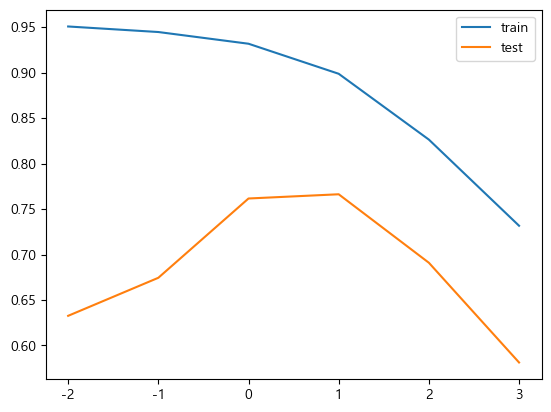

In [94]:
result.plot();

# 정리
- 일반적으로 선형회귀의 경우 어느정도 규제가 있는 경우가 성능이 좋다.
- 기본적으로 **Ridge**를 사용한다.
- Target에 영향을 주는 Feature가 몇 개뿐일 경우 특성의 가중치를 0으로 만들어 주는 **Lasso** 사용한다. 